# 'Fake' micro crystals - checking if they are revealed in the statistics

Creation Date: May 2018 <br>
Last Update: 28 Oct 2018 <br>

Author: Michael Janus

** Description: ** <br>
The goal of this notebook was to test one of the initial assumptions: is the presence of a particle in an image visible in the basic statistics (like mean, std, ...).  To this purpose, a number of images was collected, roughly half of them containing a small particle, and the other half did not. These are real microscope images, but the particles are not micro-crystals, just some dust or whatever. The images have been pre-categorized into two folders: with and without particle.


(this work was done in May 2018 in two short notebooks. This notebook was created later to merge the two and add more comments)

# 1. Import Packages

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
sns.set_style('whitegrid')
import pandas as pd
import pathlib as path
import skimage.io

import warnings
warnings.filterwarnings("ignore")

# 2. Inspect Data

Remark: if the images are not available, skip steps 2- 4 and import the csv at step 5) 

In [2]:
im_with = skimage.io.imread('../data/Fake-Xtals/cat_true/Tile_001-002-000_0-000.tif', plugin='tifffile')
im_without = skimage.io.imread('../data/Fake-Xtals/cat_false/Tile_001-002-000_0-000.tif', plugin='tifffile')

In [3]:
im_with.dtype, im_with.shape

(dtype('uint16'), (1000, 1000))

Image WITH particle


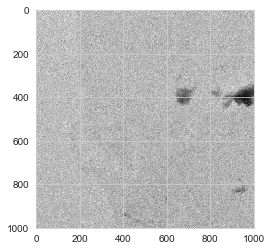

In [4]:
print("Image WITH particle")
imgplot = plt.imshow(im_with, cmap='gray')

Image WITHOUT particle


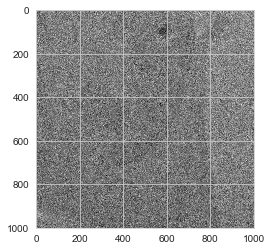

In [5]:
print("Image WITHOUT particle")
imgplot = plt.imshow(im_without, cmap='gray')


### let's put them side by side

(-0.5, 999.5, 999.5, -0.5)

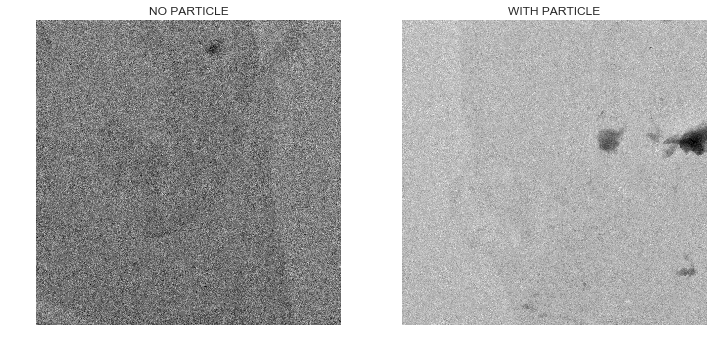

In [6]:
f, (ax1,ax2) = plt.subplots(1,2, figsize=(12,6))
ax1.imshow(im_without, cmap='gray')
ax2.imshow(im_with, cmap='gray')
ax1.set_title("NO PARTICLE")
ax2.set_title("WITH PARTICLE")
ax1.axis('off')
ax2.axis('off')


# 3. Label all images and store in data frame

In [7]:
# import files into dataframe
df = pd.DataFrame([['dummy', False]], columns=['filename','has_particle'])
df = df.drop(df.index[[0]])
pathlist1 = path.Path('../data/Fake-Xtals/cat_false')
pathlist2 = path.Path('../data/Fake-Xtals/cat_true')

for item in pathlist1.iterdir():
    filename = str(item)
    df.loc[len(df)] = [filename, False]
for item in pathlist2.iterdir():
    filename = str(item)
    df.loc[len(df)] = [filename, True]

# 4. Calculate basic image statistics

In [8]:
# Read images and determine statistics
import skimage.io
import sys


df['mean'] = 0
df['median'] = 0
df['std'] = 0
df['max'] = 0
df['min'] = 0
n = len(df)
for index, row in df.iterrows():
    imfn = row['filename']
    im = skimage.io.imread(imfn, plugin='tifffile')    
    df.at[index, 'mean'] = np.mean(im)
    df.at[index, 'median']= np.median(im)
    df.at[index, 'std'] = np.std(im)
    df.at[index, 'min'] = np.min(im)
    df.at[index, 'max'] = np.max(im)
    
    # show progress
    prline = "{0} / {1} - {2}".format(index, n, imfn)       
    sys.stdout.write("\r" + prline)
    sys.stdout.flush()


87 / 88 - ..\data\Fake-Xtals\cat_true\Tile_011-011-000_0-000.tifff

In [9]:
df.head(3)


,filename,has_particle,mean,median,std,max,min
0,..\data\Fake-Xtals\cat_false\Tile_001-002-000_...,False,4191,4112,186,5140,3341
1,..\data\Fake-Xtals\cat_false\Tile_001-003-000_...,False,4189,4112,186,5140,3084
2,..\data\Fake-Xtals\cat_false\Tile_001-005-000_...,False,4193,4112,182,5140,3341


In [10]:
df.tail(3)

,filename,has_particle,mean,median,std,max,min
85,..\data\Fake-Xtals\cat_true\Tile_011-006-000_0...,True,4192,4112,259,5397,2056
86,..\data\Fake-Xtals\cat_true\Tile_011-007-000_0...,True,4223,4112,208,5140,2313
87,..\data\Fake-Xtals\cat_true\Tile_011-011-000_0...,True,4221,4112,190,5397,2827


  ### export to csv

In [11]:
# export to csv:
df.to_csv('../data/Fake-Xtals/image_stats.csv', index=False )

# 5. (Re)Load the labelled data

In [12]:
file = "../data/Fake-Xtals/image_stats.csv"
img_df = pd.read_csv(file, sep=',')
img_df.head(3)

,filename,has_particle,mean,median,std,max,min
0,..\data\Fake-Xtals\cat_false\Tile_001-002-000_...,False,4191,4112,186,5140,3341
1,..\data\Fake-Xtals\cat_false\Tile_001-003-000_...,False,4189,4112,186,5140,3084
2,..\data\Fake-Xtals\cat_false\Tile_001-005-000_...,False,4193,4112,182,5140,3341


# 6. EDA on the labelled data

In [13]:
img_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88 entries, 0 to 87
Data columns (total 7 columns):
filename        88 non-null object
has_particle    88 non-null bool
mean            88 non-null int64
median          88 non-null int64
std             88 non-null int64
max             88 non-null int64
min             88 non-null int64
dtypes: bool(1), int64(5), object(1)
memory usage: 4.3+ KB


In [14]:
part_true = img_df[img_df['has_particle']==True].count()['has_particle']
part_false = img_df[img_df['has_particle']==False].count()['has_particle']

## 6a. Look at distributions

In [15]:
print (part_true, part_false)

44 44


** data is well  balanced between WITH and WITHOUT **

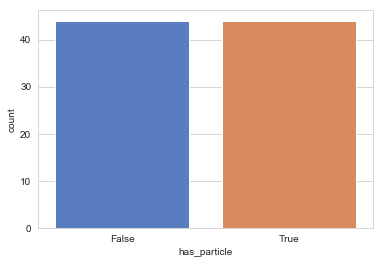

In [16]:
ax = sns.countplot(x="has_particle", data=img_df,palette="muted")

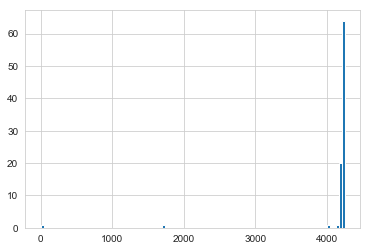

In [17]:
hplt = plt.hist(img_df['mean'], bins=100)

In [18]:
def plot_hist(statname):
    x_part = img_df[img_df['has_particle']==True][statname]
    x_nopart = img_df[img_df['has_particle']==False][statname]
    f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
    ax1.hist(x_part, bins=100)
    ax1.set_title(statname + ' WITH particles')
    ax2.hist(x_nopart, bins=100)
    ax2.set_title(statname + ' NO particles')
    f.set_figwidth(15)
    f.set_figheight(5)

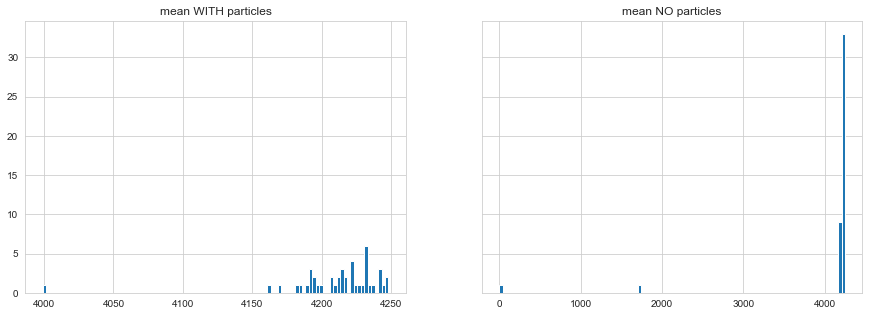

In [19]:
plot_hist('mean')

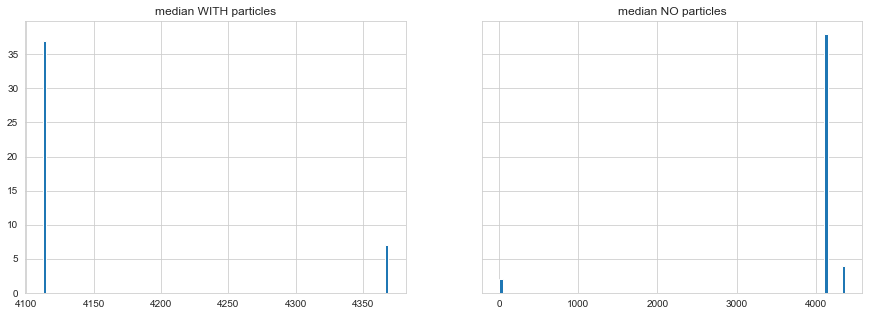

In [20]:
plot_hist('median')

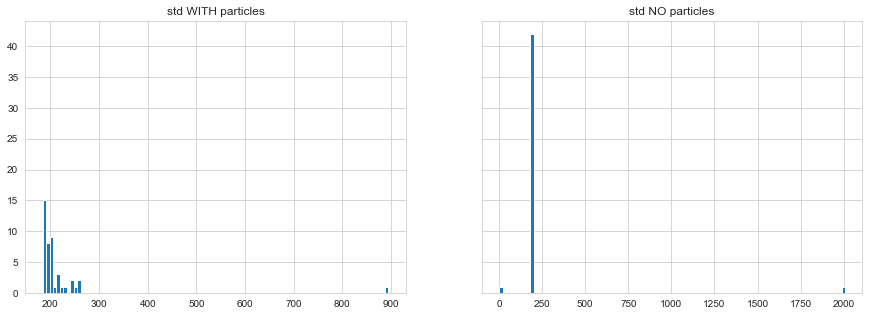

In [21]:
plot_hist('std')

## 6b. Look at scatter plots

In [22]:
def plot_scatter(stat1, stat2):
    x1 = img_df[img_df['has_particle']==True][stat1]
    y1 = img_df[img_df['has_particle']==True][stat2]
    x2 = img_df[img_df['has_particle']==False][stat1]
    y2 = img_df[img_df['has_particle']==False][stat2]

    f = plt.figure(figsize=(8,6))
    f1 = plt.scatter(x1,y1, color='blue')
    f2 = plt.scatter(x2,y2, color='red')
   
    plt.xlabel(stat1)
    plt.ylabel(stat2)
    plt.legend((f1,f2),('WITH particle', 'NO particle'), frameon=True)
    plt.show()

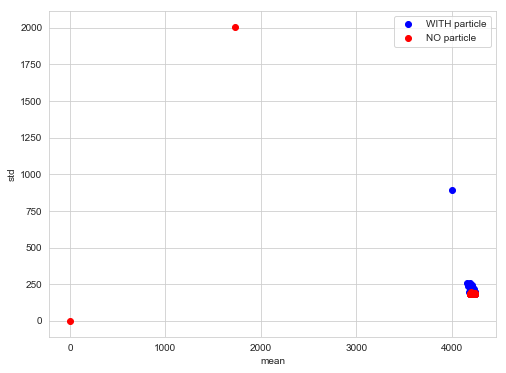

In [23]:
plot_scatter('mean','std')

** let's look at the datapoint at 0,0 **

                                             filename  has_particle  mean  \
37  ..\data\Fake-Xtals\cat_false\Tile_011-002-000_...         False     0   

    median  std  max  min  
37       0    0    0    0  


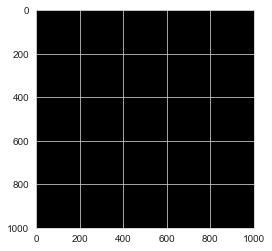

In [24]:
# This is a completely black image
print(img_df[img_df['mean']==0])
fn = img_df[img_df['mean']==0].iloc[0,0]
im = skimage.io.imread(fn, plugin='tifffile')
imgplot = plt.imshow(im, cmap='gray')

** Ah, it's completely black ! **

                                             filename  has_particle  mean  \
36  ..\data\Fake-Xtals\cat_false\Tile_011-002-000_...         False  1729   

    median   std   max  min  
36       0  2008  5140    0  


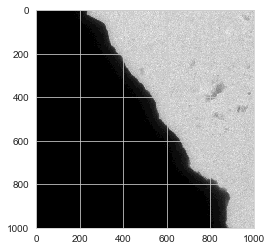

In [25]:
# This is also an outlier
print(img_df[img_df['std']>2000])
fn = img_df[img_df['std']>2000].iloc[0,0]
im = skimage.io.imread(fn, plugin='tifffile')
imgplot = plt.imshow(im, cmap='gray')

** Other outliers are the partial blacks **

### 6c. Check with pair plots if any combination is clearly separatable

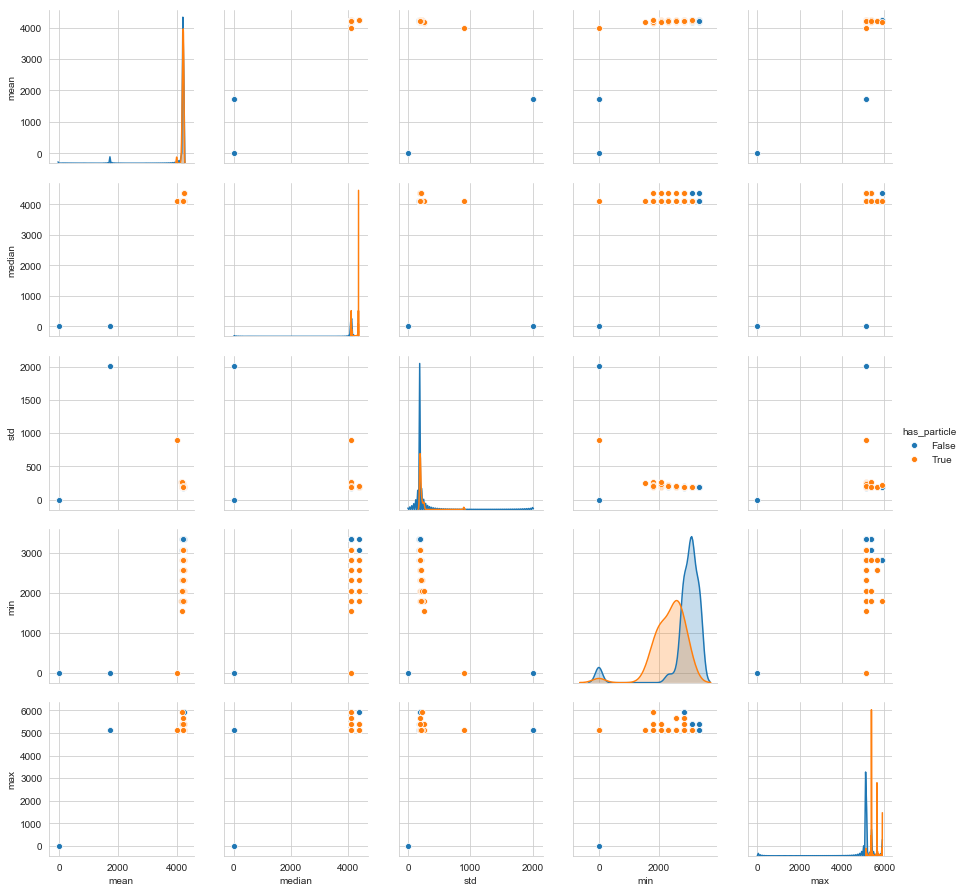

In [26]:
sns.pairplot(img_df,vars=['mean','median','std','min','max'],hue='has_particle')

Hard to see, but graph of median and std could work if outliers are excluded

# 7. Train a model

In [27]:
print(img_df.count())

filename        88
has_particle    88
mean            88
median          88
std             88
max             88
min             88
dtype: int64


In [28]:
# Create train and test set
from sklearn.model_selection import train_test_split

X = img_df[['mean','std','min','max']].astype(float).values
y = img_df[['has_particle']].astype(dtype=np.float).values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.6, random_state=42)


In [29]:
print(X_train[:5], y_train[:5])

[[4221.  190. 2827. 5397.]
 [4228.  195. 3084. 5140.]
 [4222.  186. 3084. 5140.]
 [4189.  196. 2056. 5140.]
 [4181.  198. 2313. 5140.]] [[1.]
 [1.]
 [0.]
 [1.]
 [1.]]


In [30]:
# import the classifier
from sklearn.neighbors import KNeighborsClassifier

# instantiate the model (with the default parameters)
knn = KNeighborsClassifier()

# fit the model with data (occurs in-place)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

### Show model accuracy

Text(0,0.5,'Predicted')

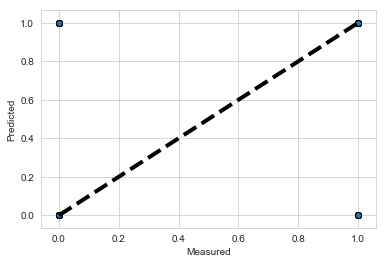

In [31]:
y_pred = knn.predict(X_test)
fig, ax = plt.subplots()
ax.scatter(y_test, y_pred, edgecolors=(0, 0, 0))
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')

** hmm, not ideal. let's use a confusion matrix (code from sklearn) **

In [32]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)
    
    f = plt.figure(figsize=(8,6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()


Normalized confusion matrix
[[0.81 0.19]
 [0.23 0.77]]


<Figure size 432x288 with 0 Axes>

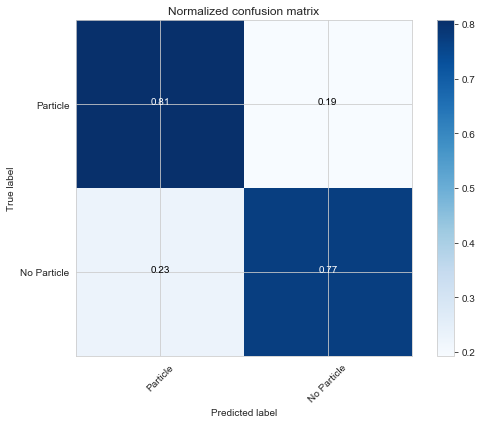

In [33]:
# Compute confusion matrix
from sklearn.metrics import confusion_matrix

cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

class_names = ['Particle','No Particle']

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,title='Normalized confusion matrix')

plt.show()

### Not perfect, but without removing any outliers there is about 80% prediction accurracy

# 8. Conclusions

* It looks viable to detect a particle in an image just from statistics
* Outliers due to (partly) black images obscure the statistics
* To inspect data points, you need to see underlying image. This is cumbersome and needs more assistance with scripts 